In [1]:
import numpy as np
import pandas as pd

# Data Preparation

In [4]:
# Reading dataset
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [5]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [12]:
# Renaming columns for convenience 
df.columns = df.columns.str.lower().str.replace(' ','_')

In [14]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [20]:
contains_string = list(df.dtypes[df.dtypes =='object'].index)

In [26]:
for col in contains_string:
    df[col] = df[col].str.lower().str.replace(' ','_')

0           premium_unleaded_(required)
1           premium_unleaded_(required)
2           premium_unleaded_(required)
3           premium_unleaded_(required)
4           premium_unleaded_(required)
                      ...              
11909       premium_unleaded_(required)
11910       premium_unleaded_(required)
11911       premium_unleaded_(required)
11912    premium_unleaded_(recommended)
11913                  regular_unleaded
Name: engine_fuel_type, Length: 11914, dtype: object

# Exploratory Data Analysis

In [36]:
for col in df.columns:
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

['1_series_m' '1_series' '100' '124_spider' '190-class']
914

[2011 2012 2013 1992 1993]
28

['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

[335. 300. 230. 320. 172.]
356

[ 6.  4.  5.  8. 12.]
9

['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

[ 2.  4.  3. nan]
3

['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

['compact' 'midsize' 'large']
3

['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

[26 28 27 25 24]
59

[19 20 18 17 16]
69

[3916 3105  819  617 1013]
48

[46135 40650 36350 29450 34500]
6049



In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='msrp', ylabel='Count'>

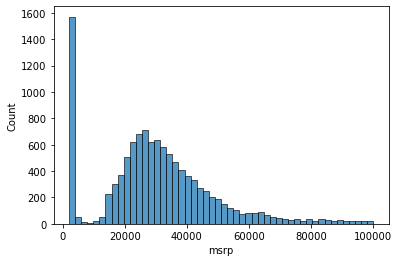

In [45]:
sns.histplot(df['msrp'][df['msrp']<100000],bins=50)

In [46]:
# To normalize data
prices_log = np.log1p(df.msrp)

In [47]:
prices_log

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<AxesSubplot:xlabel='msrp', ylabel='Count'>

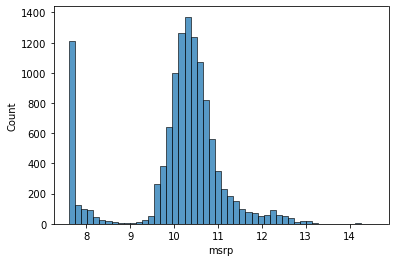

In [48]:
sns.histplot(prices_log,bins=50)

Missing values

In [50]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Validation data

In [56]:
# Splitting dataset into 20,20,60
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-(n_val+n_test)

In [57]:
n, n_val+n_test+n_train

(11914, 11914)

In [63]:
#Shuffle data
idx=np.arange(n)
np.random.shuffle(idx)

In [65]:
df_val = df.iloc[idx[:n_val]]
df_test = df.iloc[idx[n_val:n_val+n_test]]
df_train = df.iloc[idx[n_val+n_test:]]

In [72]:
len(df_val),len(df_test),len(df_train)

(2382, 2382, 7150)

In [78]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [80]:
df_test

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,nissan,370z,2015,premium_unleaded_(required),350.0,6.0,automatic,rear_wheel_drive,2.0,"factory_tuner,high-performance",compact,coupe,26,19,2009,46790
1,volkswagen,jetta_sportwagen,2013,diesel,140.0,4.0,manual,front_wheel_drive,4.0,diesel,compact,wagon,42,30,873,25795
2,cadillac,escalade,2016,premium_unleaded_(recommended),420.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,performance",large,4dr_suv,22,15,1624,77045
3,toyota,tundra,2015,regular_unleaded,381.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,17,13,2031,42550
4,cadillac,cts_wagon,2014,regular_unleaded,318.0,6.0,automatic,all_wheel_drive,4.0,"luxury,performance",midsize,wagon,26,18,1624,51695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,mercedes-benz,gla-class,2016,premium_unleaded_(required),208.0,4.0,automated_manual,all_wheel_drive,4.0,"crossover,luxury",compact,4dr_suv,32,24,617,34500
2378,volkswagen,beetle_convertible,2015,diesel,150.0,4.0,automated_manual,front_wheel_drive,2.0,diesel,compact,convertible,40,30,873,31395
2379,oldsmobile,achieva,1997,regular_unleaded,150.0,4.0,unknown,front_wheel_drive,4.0,NaN,midsize,sedan,29,19,26,2000
2380,cadillac,escalade,2015,flex-fuel_(unleaded/e85),420.0,8.0,automatic,rear_wheel_drive,4.0,"flex_fuel,luxury,performance",large,4dr_suv,21,15,1624,75695


In [83]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [84]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [86]:
len(y_train)

7150

# Linear Regression

In [89]:
df_train.iloc[10]

make                           nissan
model                           rogue
year                             2017
engine_fuel_type     regular_unleaded
engine_hp                       170.0
engine_cylinders                  4.0
transmission_type           automatic
driven_wheels         all_wheel_drive
number_of_doors                   4.0
market_category             crossover
vehicle_size                  midsize
vehicle_style                 4dr_suv
highway_mpg                        32
city_mpg                           25
popularity                       2009
Name: 10, dtype: object

In [90]:
y_train[10]

10.351724752488161

In [91]:
xi = [453,11,86]

In [92]:
w0 = 0
w = [1,1,1]       # formula y = w0+ w1*x1 + w2*x2+ w3*x3

In [94]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for i in range(n):
        pred = pred + w[i]*xi[i]
    
    
    return pred

In [95]:
linear_regression(xi)

550

In [98]:
xi = [453,11,86]

w0 = 7.17
w = [0.01,0.04,0.002]

In [99]:
linear_regression(xi)

12.312

In [100]:
np.expm1(linear_regression(xi))

222347.2221101062

In [101]:
np.log1p(222347.2221101062)

12.312

# Linear Regression Vector Form

In [102]:
w_new = [w0] + w

In [103]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [106]:
x1 = [1,148,24,1385]
x2 = [1,132,25,2031]
x10 = [1,453,11,86]

x = [x1,x2,x10]
x

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [107]:
X = np.array(x)

In [108]:
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [109]:
def linear_regression(X):
    return X.dot(w_new)

In [110]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Training a linear regression model

In [173]:
def train_linear_regression(X,y):
    pass

In [194]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [175]:
ones = np.ones(X.shape[0])

In [176]:
X = np.column_stack([ones,X])

In [177]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [178]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [179]:
# w = (X^T * X)^(-1)*y*X^T
XTX = X.T.dot(X)

In [180]:
XTX_inv = np.linalg.inv(XTX)

In [181]:
XTX.dot(XTX_inv).round(1)

array([[ 1., -0.,  0.,  0.],
       [ 0.,  1.,  0., -0.],
       [ 0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  1.]])

In [182]:
w_full = XTX_inv.dot(X.T).dot(y)

In [183]:
w_full

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [184]:
# negative values mean that for that particular feature the price decreases

In [185]:
w0 = w_full[0]
w = w_full[1:]

In [186]:
w0,w

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [193]:
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [195]:
# Lets put all to a function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

In [196]:
train_linear_regression(X, y)


(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [197]:
y_train

array([10.72328941, 11.61413638, 12.37201496, ...,  9.90827607,
        7.60140233, 10.68729777])

# Car price baseline model

In [200]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [215]:
x_train = df_train[['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']]

In [216]:
X_train = x_train.fillna(0).values

In [263]:
X_train.shape

(7150, 41)

In [264]:
y_train.shape

(7150,)

In [220]:
w0, w = train_linear_regression(X_train,y_train)

In [221]:
#Predict

# y_predict = w0 + w*X_train

y_pred = w0 + X_train.dot(w)


<AxesSubplot:ylabel='Count'>

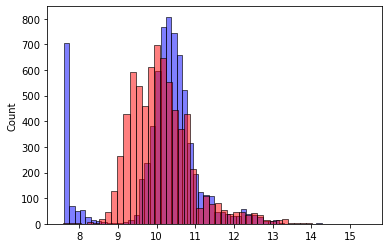

In [225]:
sns.histplot(y_train,color='blue',alpha=0.5,bins=50)
sns.histplot(y_pred,color='red',alpha=0.5,bins=50)

# RMSE

In [226]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [227]:
rmse(y_train, y_pred)


0.74200939002926

# Validating the model


In [228]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [229]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7539867503784818

# Simple feature engineering

In [230]:
# adding new feature o the dataframe : age (the current year - year of the car)
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [231]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5242105805859097

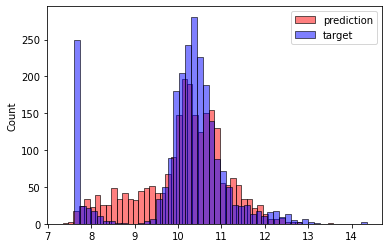

In [232]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

# Categorical variables

In [233]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [235]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [237]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

96.02341797677737

In [238]:
w0, w


(-3.1521422768740776e+16,
 array([-1.40542291e-01, -1.48846603e+01, -2.77730735e+01,  1.40904009e+01,
         6.68659607e-03, -4.68446586e+00, -1.13964597e+04, -1.14635158e+04,
        -1.14208714e+04,  1.35910234e+01, -4.70888817e+01,  3.21160962e+00,
        -1.44919115e+01, -1.76319788e+01, -2.27946322e+01, -3.97152936e+01,
         3.27443546e+01, -7.66935963e+00, -4.75190766e+01,  3.11072823e+02,
         3.15849518e+02,  3.30684826e+02,  3.04956869e+02,  4.48308949e+02,
         3.15214228e+16,  3.15214228e+16,  3.15214228e+16,  3.15214228e+16,
        -1.51247302e+01, -1.00637183e+01,  2.30873801e+01,  2.13753463e+01,
         8.04749214e+01,  5.42433768e+01,  3.20532676e+01,  5.03143261e+01,
        -1.86871270e-02, -2.05478706e-02,  2.54928227e-01,  4.46231171e-01,
        -2.15666123e-01]))

# Regularization

In [239]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [240]:
y= [1, 2, 3, 1, 2, 3]


In [241]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [242]:
XTX_inv = np.linalg.inv(XTX)

In [243]:
XTX_inv.dot(X.T).dot(y)

array([-1.93908875e-01, -3.61854375e+06,  3.61854643e+06])

In [244]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [245]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [246]:
XTX = XTX + 0.01 * np.eye(3)


In [247]:
np.linalg.inv(XTX)


array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [248]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.46721513409518395

# Tuning the model

In [249]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 -3.1521422768740776e+16 96.02341797677737
1e-05 8.279062380880468 0.46722492338902466
0.0001 7.76627272242936 0.46722483932300163
0.001 7.76790565027858 0.46722394130966644
0.1 7.575513589729123 0.4671437694375696
1 6.559708511908815 0.46727852830629873
10 4.720825799366706 0.4795581469417259


In [250]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score


0.46722394130966644

# Using the model

In [253]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [254]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[250.,   5.,  25., ...,   0.,   0.,   0.],
       [577.,   8.,  18., ...,   0.,   0.,   0.],
       [600.,  12.,  17., ...,   0.,   1.,   0.],
       ...,
       [375.,   4.,  29., ...,   0.,   0.,   0.],
       [370.,   6.,  28., ...,   1.,   0.,   0.],
       [115.,   4.,  27., ...,   0.,   1.,   0.]])

In [255]:
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.5270538056396813

In [256]:
car = df_test.iloc[20].to_dict()
car

{'make': 'hummer',
 'model': 'h3',
 'year': 2010,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 239.0,
 'engine_cylinders': 5.0,
 'transmission_type': 'manual',
 'driven_wheels': 'four_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'flex_fuel,luxury',
 'vehicle_size': 'midsize',
 'vehicle_style': '4dr_suv',
 'highway_mpg': 18,
 'city_mpg': 14,
 'popularity': 130}

In [257]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,hummer,h3,2010,regular_unleaded,239.0,5.0,manual,four_wheel_drive,4.0,"flex_fuel,luxury",midsize,4dr_suv,18,14,130


In [260]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.044094329868862

In [261]:
np.expm1(y_pred)


23018.439414416433

In [262]:
np.expm1(y_test[20])


35959.99999999998